## Dependencies

### Library Installation (if needed)

In [1]:
#! pip install -qUr requirements.txt

In [2]:
import pandas as pd
import yfinance as yf
from methods.screener_methods import *
from tqdm import tqdm

### Single import

HVID.CO


,Ticker,Name,Earnings,Signal,Final Score,Value Score,Momentum Score,Leadership Score,P/E Score,ROA Score,...,ROA%,EPS,P/B,D/E,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,HVID.CO,Hvidbjerg Bank A/S,NaN,Hold,0.13,0.12,0.01,0.1,0.73,-0.79,...,1.35,96.76,1.2,NaN,0.0,0.01,Financial Services,Banks - Regional,Denmark,False


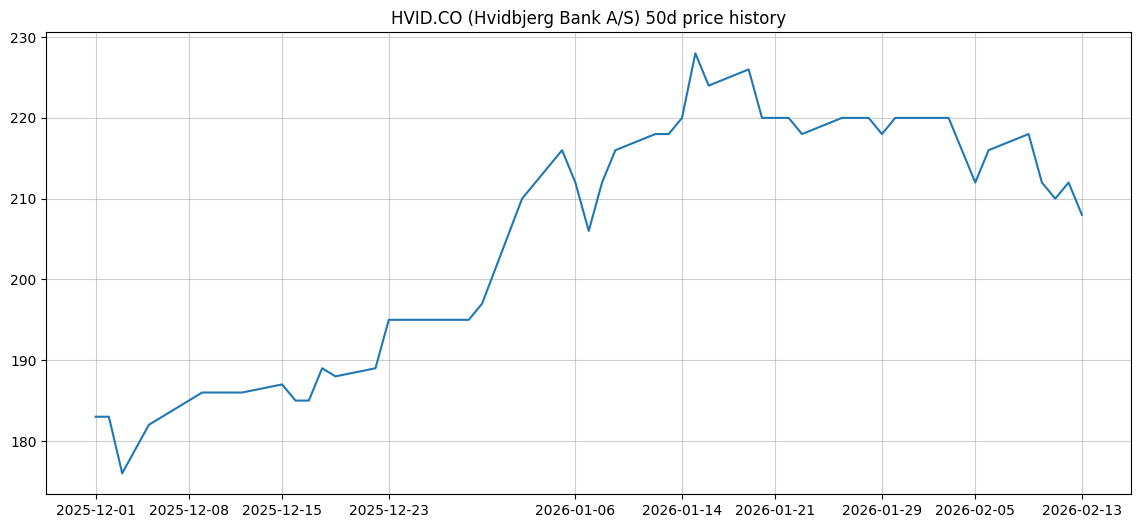

50d Average Change%: 0.01


In [3]:
symbol = "HVID.CO"
stock = Stock(symbol)
print(stock.symbol)
display(stock.summary())
stock.price_graph("50d")
print(f"50d Average Change%: {round(stock.momentum, 2)}")

### Screener

In [4]:
symbol_list = "simple" #"simple", "danish", "filtered", "all"

if symbol_list == "all":
    symbols = (
        pd.read_csv("../data/tickers/tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].to_list()
    )
elif symbol_list == "filtered":
    symbols = pd.read_csv("../data/tickers/screener_filtered_tickers.csv")["Ticker"].tolist()
elif symbol_list == "danish":
    symbols = pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist()
else:
    symbols = pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].tolist()
symbols = list(set(symbols))

In [5]:
import sys, io
df = pd.DataFrame()
for symbol in tqdm(symbols, smoothing=0):
    old_stderr = sys.stderr
    sys.stderr = io.StringIO()
    try:
        df = pd.concat([df, Stock(symbol).summary()])
    except Exception:
        pass
    finally:
        sys.stderr = old_stderr
df = df.sort_values(by="Final Score", ascending=False)
display(df)
if symbol_list == "simple":
    df.to_csv("../data/screener_results/simple_screener_results.csv", index=False)
elif symbol_list == "danish":
    df.to_csv("../data/screener_results/danish_screener_results.csv", index=False)
elif symbol_list == "filtered" or symbol_list == "all":   
    df.to_csv("../data/screener_results/screener_results.csv", index=False)
    df["Ticker"].to_csv("../data/tickers/screener_filtered_tickers.csv", index=False)

100%|██████████| 83/83 [01:07<00:00,  1.23it/s]


,Ticker,Name,Earnings,Signal,Final Score,Value Score,Momentum Score,Leadership Score,P/E Score,ROA Score,...,ROA%,EPS,P/B,D/E,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,TRMD,TORM plc,26-02-2026,Buy,3.17,1.75,1.41,0.16,0.85,0.58,...,5.99,2.73,1.14,0.42,0.0,0.14,Energy,Oil & Gas Midstream,United Kingdom,True
0,BAVA.CO,Bavarian Nordic A/S,14-11-2025,Buy,2.10,2.39,-0.29,0.36,0.96,0.83,...,7.78,30.70,1.13,0.01,0.0,-0.02,Healthcare,Biotechnology,Denmark,False
0,STG.CO,Scandinavian Tobacco Group A/S,04-03-2026,Buy,2.01,1.44,0.57,0.22,0.75,0.40,...,5.37,9.20,0.95,0.65,0.0,0.05,Consumer Defensive,Tobacco,Denmark,True
0,MTHH.CO,MT Højgaard Holding A/S,20-02-2026,Buy,1.67,1.63,0.04,0.20,0.73,0.71,...,6.62,44.91,3.39,0.20,0.0,0.00,Industrials,Engineering & Construction,Denmark,True
0,HLUN-A.CO,H. Lundbeck A/S A,04-02-2026,Buy,1.34,1.60,-0.26,0.02,0.74,0.72,...,6.70,3.22,1.42,0.47,0.0,-0.02,Healthcare,Drug Manufacturers - Specialty & Generic,Denmark,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,HIMS,"Hims & Hers Health, Inc.",23-02-2026,Sell,-1.01,-0.51,-0.51,-0.00,-0.91,0.46,...,5.54,0.53,6.19,1.92,49.8,-0.51,Healthcare,Drug Manufacturers - Specialty & Generic,United States,False
0,GN.CO,GN Store Nord A/S,05-02-2026,Sell,-1.07,-0.64,-0.43,0.05,-0.33,-0.30,...,3.56,4.48,1.29,0.99,0.0,-0.10,Healthcare,Medical Devices,Denmark,False
0,HARB-B.CO,Harboes Bryggeri B A/S,NaN,Sell,-2.14,-1.57,-0.56,0.03,-1.10,-0.75,...,1.70,2.03,0.61,0.23,0.0,-0.05,Consumer Defensive,Beverages - Brewers,Denmark,False
0,TSLA,"Tesla, Inc.",21-04-2026,Sell,-2.43,-1.67,-0.76,0.15,-1.10,-0.70,...,2.10,1.08,19.05,0.18,0.6,-0.06,Consumer Cyclical,Auto Manufacturers,United States,False
